<a href="https://colab.research.google.com/github/Vandanasharma-1/Personal-Project-Practice-ML-/blob/main/Customer%20Segmentation%20using%20Clustering%20Unsupervised%20Learning%20(K-Means%2C%20PCA)%2C%20Silhouette%20Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import make_blobs

In [4]:
# Set a style for the plots
sns.set_style("whitegrid")
sns.set_palette("tab10")

In [5]:
print("Generating synthetic customer data...")

Generating synthetic customer data...


In [6]:
# We use make_blobs to create a dataset with 5 features and 3 clear clusters.
# n_samples=500: We will have 500 data points.
# n_features=5: Each data point will have 5 features (e.g., spending in different categories).
# centers=3: The data will be generated around 3 distinct centers, creating 3 clusters.
# cluster_std=1.5: This controls the standard deviation of the clusters (how spread out they are).
# random_state=42: Ensures we get the same data every time we run the code.
X, y_true = make_blobs(n_samples=500, centers=3,
                       n_features=5, cluster_std=1.5,
                       random_state=42)

In [7]:
# Create a Pandas DataFrame for better data handling
customer_data=pd.DataFrame(X, columns=['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5'])
customer_data['CustomerID']=range(1, len(customer_data)+1)

In [8]:
customer_data.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,CustomerID
0,-9.857126,9.521966,6.406806,-6.817576,-7.860545,1
1,-8.047178,8.402616,6.409461,-4.335760,-6.702892,2
2,-3.736909,6.760139,4.248776,0.285041,-7.103182,3
3,-7.706532,-8.765750,6.292208,1.825926,2.609019,4
4,-8.202067,8.764247,7.663750,-6.557157,-5.553464,5


In [9]:
print("Synthetic data generated successfully")
print("\nFirst 5 rows of the data:")
print(customer_data.head())
print(f"\nShape of the dataset: {customer_data.shape}")

Synthetic data generated successfully

First 5 rows of the data:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  CustomerID
0  -9.857126   9.521966   6.406806  -6.817576  -7.860545           1
1  -8.047178   8.402616   6.409461  -4.335760  -6.702892           2
2  -3.736909   6.760139   4.248776   0.285041  -7.103182           3
3  -7.706532  -8.765750   6.292208   1.825926   2.609019           4
4  -8.202067   8.764247   7.663750  -6.557157  -5.553464           5

Shape of the dataset: (500, 6)


## Data Preprocessing with scaling

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
# --- 2. Data Preprocessing (Feature Scaling) ---
# It is crucial to scale the features before applying K-Means.
# This is because K-Means is a distance-based algorithm, and features with
# larger magnitudes can disproportionately influence the result.
print("\nScaling the data using StandardScaler...")


Scaling the data using StandardScaler...


In [12]:
# Select the features for clustering (excluding CustomerID)
features_to_cluster=customer_data.drop('CustomerID', axis=1)

In [13]:
features_to_cluster.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5
0,-9.857126,9.521966,6.406806,-6.817576,-7.860545
1,-8.047178,8.402616,6.409461,-4.335760,-6.702892
2,-3.736909,6.760139,4.248776,0.285041,-7.103182
3,-7.706532,-8.765750,6.292208,1.825926,2.609019
4,-8.202067,8.764247,7.663750,-6.557157,-5.553464


In [14]:
# Initialize and fit the StandardScaler
# This will transform the data such that each feature has a mean of 0 and a standard deviation of 1.
scaler= StandardScaler()
scaled_features=scaler.fit_transform(features_to_cluster)

In [15]:
scaled_features

array([[-1.07039133,  0.74546814,  0.0859273 , -1.58466105, -0.90798501],
       [-0.52251206,  0.61451192,  0.08731966, -0.95761934, -0.68801347],
       [ 0.78222538,  0.4223533 , -1.04593191,  0.20984645, -0.76407462],
       ...,
       [ 0.14922774, -1.22161917,  0.65212732,  0.82409945,  1.98001159],
       [ 1.16073493,  0.7636525 , -0.01629411,  0.39814317, -0.84828797],
       [-0.70166364, -1.61902103,  1.11350971,  1.38647649,  1.30212699]])

In [16]:
# We can also inspect the first few rows of the scaled data to see the effect
print("\nFirst 5 rows of scaled data:")
print(pd.DataFrame(scaled_features, columns=features_to_cluster.columns).head())


First 5 rows of scaled data:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5
0  -1.070391   0.745468   0.085927  -1.584661  -0.907985
1  -0.522512   0.614512   0.087320  -0.957619  -0.688013
2   0.782225   0.422353  -1.045932   0.209846  -0.764075
3  -0.419397  -1.394069   0.025822   0.599158   1.081389
4  -0.569398   0.656820   0.745178  -1.518865  -0.469605


## The Elbow Method

In [17]:
# --- 3. Determining the Optimal Number of Clusters (k) using the Elbow Method ---
# The Elbow Method helps us find a good number of clusters. It plots the
# sum of squared distances from each point to its assigned cluster center,
# and we look for an "elbow" in the plot.
print("\nRunning the Elbow Method to find the optimal number of clusters...")


Running the Elbow Method to find the optimal number of clusters...


In [18]:
from sklearn.cluster import KMeans

In [19]:
sse=[]
k_range=range(1,11)

for k in k_range:
    kmeans=KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

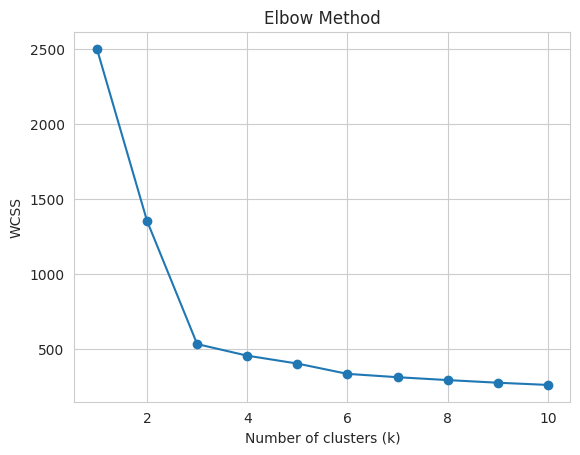

In [20]:
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [21]:
print("Based on the plot, a good choice for 'k' is where the curve begins to flatten.")
print("For this synthetic data, it's visually apparent that k=3 is the optimal number.")

Based on the plot, a good choice for 'k' is where the curve begins to flatten.
For this synthetic data, it's visually apparent that k=3 is the optimal number.


## K-Means Clustering and Silhouette Score

In [22]:
from sklearn.metrics import silhouette_score

In [29]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_features)


In [30]:
# Add the cluster labels back to the original dataframe
customer_data['Cluster']=cluster_labels

In [31]:
cluster_labels

array([2, 2, 0, 1, 2, 0, 0, 1, 1, 0, 0, 0, 1, 2, 2, 2, 1, 1, 0, 2, 0, 1,
       1, 2, 0, 2, 1, 1, 2, 1, 1, 0, 1, 2, 0, 0, 1, 1, 2, 2, 0, 2, 1, 2,
       0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 1, 1, 0,
       2, 2, 2, 2, 1, 0, 0, 2, 1, 2, 1, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       2, 0, 2, 1, 0, 2, 2, 2, 2, 0, 2, 1, 0, 1, 0, 2, 1, 2, 0, 2, 0, 1,
       1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 2, 0, 2, 2, 1, 0, 2, 1, 2, 0, 2, 1,
       2, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 2, 1, 1, 1, 0, 0,
       0, 0, 2, 2, 1, 1, 0, 2, 2, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       2, 0, 0, 2, 1, 1, 2, 2, 0, 0, 1, 0, 0, 1, 1, 2, 1, 2, 1, 0, 2, 2,
       0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 2, 1, 2, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 2, 1, 1,
       0, 2, 1, 2, 1, 0, 1, 1, 1, 2, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 2,
       2, 2, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 1,

In [32]:
print("Clustering complete. The 'Cluster' column has been added to the dataframe.")
print("\nCustomer counts per cluster:")
print(customer_data['Cluster'].value_counts())

Clustering complete. The 'Cluster' column has been added to the dataframe.

Customer counts per cluster:
Cluster
0    167
1    167
2    166
Name: count, dtype: int64


In [34]:
# --- 5. Evaluating the Clustering with the Silhouette Score ---
# The Silhouette Score measures how similar a data point is to its own cluster
# compared to other clusters. The score ranges from -1 to 1, where a higher score
# indicates better-defined clusters.

In [35]:
score=silhouette_score(scaled_features, cluster_labels)

In [36]:
score

np.float64(0.6063666690033696)

In [37]:
from sklearn.decomposition import PCA

In [38]:
pca=PCA(n_components=2, random_state=42)
principal_components=pca.fit_transform(scaled_features)

In [40]:
# Create a DataFrame for the principal components
pca_df=pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster']=cluster_labels
print("PCA completed. The data is now ready for visualization.")

PCA completed. The data is now ready for visualization.


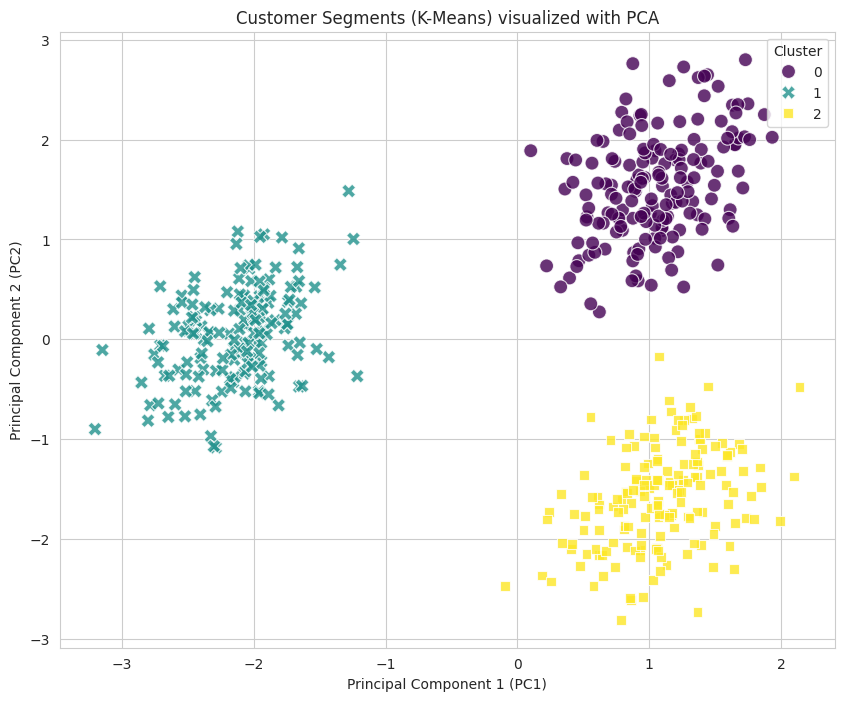

In [41]:
# A scatter plot of the first two principal components, colored by their
# assigned cluster, provides a clear visual of the segmentation.
plt.figure(figsize=(10,8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df,
                palette='viridis', style='Cluster', s=100, alpha=0.8)
plt.title('Customer Segments (K-Means) visualized with PCA')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()